In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import gzip

In [3]:
file_path = rf'D:\Datasets\Illegal Fishing\Processed Data\Complete_ship_data.csv'
df = pd.read_csv(file_path)

df.columns

X_if = df[['speed', 'distance_from_shore', 'distance_from_port', 'lat', 'lon']].values

#X_if = df[['speed', 'course', 'distance_from_shore', 'distance_from_port', 'lat', 'lon','gear_type_encoded']].values
y_if = df['is_fishing'].values

X_if_train, X_if_test, y_if_train, y_if_test = train_test_split(X_if, y_if, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_if_train = scaler.fit_transform(X_if_train)
X_if_test = scaler.transform(X_if_test)

In [4]:

# Training set class distribution
unique_train, counts_train = np.unique(y_if_train, return_counts=True)
print(f"Training set class distribution: {dict(zip(unique_train, counts_train))}")

# Test set class distribution
unique_test, counts_test = np.unique(y_if_test, return_counts=True)
print(f"Test set class distribution: {dict(zip(unique_test, counts_test))}")


Training set class distribution: {0: 240702, 1: 202382}
Test set class distribution: {0: 60064, 1: 50707}


In [5]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42, class_weight='balanced')

# Fit the model
rf_model.fit(X_if_train, y_if_train)

# Make predictions
rf_predictions = rf_model.predict(X_if_test)

# Evaluate the model
print( confusion_matrix(y_if_test, rf_predictions))
print(classification_report(y_if_test, rf_predictions, target_names=['Not Fishing', 'Fishing']))


[[54874  5190]
 [ 1944 48763]]
              precision    recall  f1-score   support

 Not Fishing       0.97      0.91      0.94     60064
     Fishing       0.90      0.96      0.93     50707

    accuracy                           0.94    110771
   macro avg       0.93      0.94      0.94    110771
weighted avg       0.94      0.94      0.94    110771



In [10]:

with gzip.open('random_forest_fishing_model.pkl.gz', 'wb') as f:
    pickle.dump(rf_model, f)

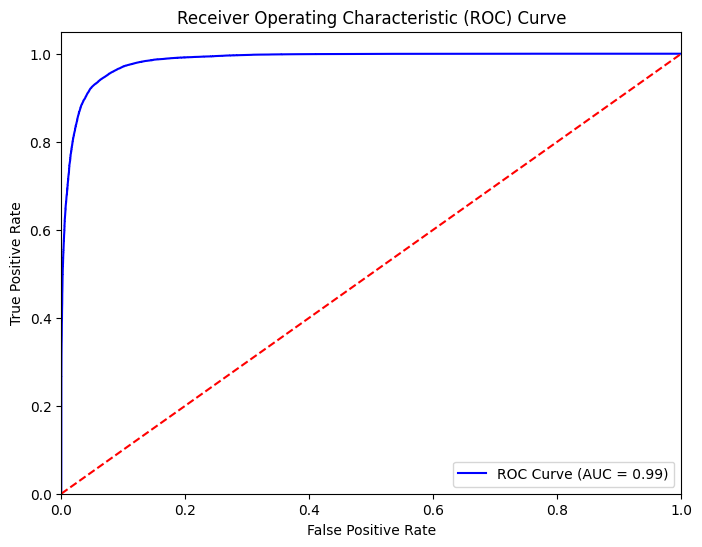

In [5]:

# Get probabilities for the positive class
rf_probabilities = rf_model.predict_proba(X_if_test)[:, 1]  

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_if_test, rf_probabilities)
roc_auc = roc_auc_score(y_if_test, rf_probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
